In [12]:
import numpy as np
np.random.seed(123)  # for reproducibility
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Input
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

print("Finished loading required modules")

Finished loading required modules


===============Data has finished loading===============
Training set has 60000 images of size (28,28) - trainData is of shape: (60000, 28, 28)
trainLabels is a 1D array with 60000 elements

Testing set has 10000 images of size (28,28) - testData is of shape: (10000, 28, 28)
testLabels is a 1D array with 10000 elements
Label of sample image is 4


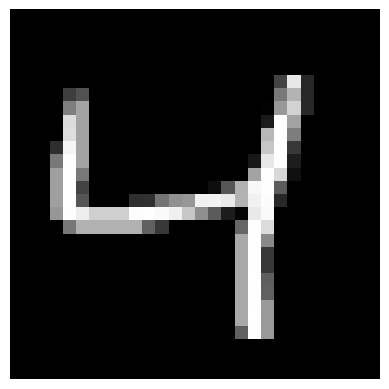

In [34]:
# Import the MNIST dataset
(trainData, trainLabels), (testData, testLabels) = mnist.load_data()
print("===============Data has finished loading===============")
print("Training set has %d images of size (28,28) - trainData is of shape: %s" % (trainData.shape[0], str(trainData.shape)))
print("trainLabels is a 1D array with %d elements" % (len(trainLabels)))
print("")
print("Testing set has %d images of size (28,28) - testData is of shape: %s" % (testData.shape[0], str(testData.shape)))
print("testLabels is a 1D array with %d elements" % (len(testLabels)))

samp_img_ind = 2
plt.imshow(trainData[samp_img_ind,:,:],cmap='gray')
plt.axis('off')
print("Label of sample image is %d" % trainLabels[samp_img_ind])

In [3]:
# Convert image datatype to float32 and normalize values between 0 and 1
trainData = trainData.astype("float32")
trainData = trainData / 255.0
testData = testData.astype("float32")
testData = testData/ 255.0
# Add extract dimension to end of data as keras expect each image to have 3 dimensions (even if last dimension is 1)
trainData = trainData[:,:,:,np.newaxis]
testData = testData[:,:,:,np.newaxis]
print("Finished normalizing data")
print("trainData has shape %s" % str(trainData.shape))
print("testData has shape %s" % str(testData.shape))

Finished normalizing data
trainData has shape (60000, 28, 28, 1)
testData has shape (10000, 28, 28, 1)


In [4]:
# Labels are in a 1D array where each element corresponds to a single image. However, we want the labels to
# be of size (n,10) where n is the number of images. Meaning each row contains a "1-hot" vector corresponding
# to a single image

trainLabels = to_categorical(trainLabels, 10)
testLabels = to_categorical(testLabels, 10)

print("Train labels is of shape: %s" % str(trainLabels.shape))
print("Test labels is of shape: %s" % str(testLabels.shape))

if len(trainLabels.shape) > 2 or len(testLabels.shape) > 2:
    print("\nWARNING: trainLabels and testLabels should have at most 2 dimensions. If you have run this block of code multiple times please reload the data and try again")

Train labels is of shape: (60000, 10)
Test labels is of shape: (10000, 10)


In [ ]:
# OPTIONAL add bias - recommend skipping this your first time running the code
print("trainData has shape %s" % str(trainData.shape))
print("trainLabels is of shape: %s" % str(trainLabels.shape))

# USER INPUT - Next to each number list the fraction of data you want to keep
percKeepList = {0: 1,
                1: 1,
                2: 1,
                3: 1,
                4: 1,
                5: 0.05,
                6: 1,
                7: 1,
                8: 1,
                9: 1
               }
trainLabel1D = np.argmax(trainLabels, axis=1)
indsToRemoveTotal = np.array([])
# Get indices of each number
for num in percKeepList:
    percToKeep = percKeepList[num]
    percToRemove = 1 - percToKeep
    indsForNum = np.squeeze(np.argwhere(trainLabel1D == num))
    numToRemove = int(np.round(len(indsForNum) * percToRemove))
    numRemaining = len(indsForNum) - numToRemove
    indsToRemove = np.random.choice(indsForNum, numToRemove)
    indsToRemoveTotal = np.concatenate([indsToRemoveTotal, indsToRemove])
    print("%d: %d removed, %d remaining" % (num, numToRemove, numRemaining))
indsToRemoveTotal = [int(i) for i in indsToRemoveTotal]
trainData = np.delete(trainData, indsToRemoveTotal, axis=0)
trainLabels = np.delete(trainLabels, indsToRemoveTotal, axis=0)

print("trainData has shape %s" % str(trainData.shape))
print("trainLabels is of shape: %s" % str(trainLabels.shape))

trainData has shape (60000, 28, 28, 1)
trainLabels is of shape: (60000, 10)
0: 0 removed, 5923 remaining
1: 0 removed, 6742 remaining
2: 0 removed, 5958 remaining
3: 0 removed, 6131 remaining
4: 0 removed, 5842 remaining
5: 5150 removed, 271 remaining
6: 0 removed, 5918 remaining
7: 0 removed, 6265 remaining
8: 0 removed, 5851 remaining
9: 0 removed, 5949 remaining
trainData has shape (56677, 28, 28, 1)
trainLabels is of shape: (56677, 10)


In [5]:
# OPTIONAL data augmentation - recommend skipping this your first time running the code
# Data augmentation
image_datagen = image.ImageDataGenerator(zoom_range=0.1,
                                        rotation_range=15,
                                        width_shift_range=0.1,
                                        height_shift_range=0.1)
train_generator = image_datagen.flow(trainData, trainLabels, batch_size=32)
print("Loaded augmentation")

Loaded augmentation


In [6]:
model = Sequential()
model.add(Flatten(input_shape=(28,28,1)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
print("Finished defining model")
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Finished defining model


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,450 (99.41 KB)

 Trainable params: 25,450 (99.41 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print("Finished compiling the model")

Finished compiling the model


In [ ]:
# NOTE: Use this fit call only if you DID NOT use data augmentation
model.fit(trainData, trainLabels,
        epochs=10, verbose=1)
print("Finished fitting the model")

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7896 - loss: 0.9587
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9226 - loss: 0.2816
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9371 - loss: 0.2176
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9478 - loss: 0.1842
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9545 - loss: 0.1596
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9593 - loss: 0.1461
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9617 - loss: 0.1323
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9653 - loss: 0.1219
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9681 - loss: 0.1118
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9702 - loss: 0.1034
Finished fitting the model


In [8]:
# NOTE: Use this fit call only if you used data augmentation
model.fit(train_generator,
        epochs=10, verbose=1)
print("Finished fitting the model")

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.5404 - loss: 1.5258
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.7467 - loss: 0.8580
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8072 - loss: 0.6674
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8368 - loss: 0.5619
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8568 - loss: 0.4962
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 12ms/step - accuracy: 0.8671 - loss: 0.4556
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8747 - loss: 0.4300
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8826 - loss: 0.3988
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.8855 - loss: 0.3858
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8927 - loss: 0.3679
Finished fitting the model


In [9]:
# Evaluate the model
print("Evaluating")
score = model.evaluate(testData, testLabels, verbose=0)
print("Finished evaluating")
print("Loss of %0.4f" % score[0])
print("Accuracy of %0.4f" % score[1])

Evaluating
Finished evaluating
Loss of 0.1904
Accuracy of 0.9450


In [10]:
# This will allow you to display predictions for MNIST training

import pandas as pd
from IPython.core.display import HTML
from PIL import Image
from io import BytesIO
import base64

# Display predictions
numToTest = 50
numChoiceToDisplay = 10
displayWidth = 35
displayWrongOnly = False

# Check to ensure at most 10 are requested for display
if numChoiceToDisplay > 10:
    raise ValueError("Can only display up to 10 choices")

# This formats numbers in either decimal or scientific notation
def formatDec(dec):
    if dec < 0.1:
        return "%.2E" % dec
    else:
        return "%0.2F" % dec
# This takes an image index and converts the image to base64 encoding for HTML display
def indexToImgHTML(index):
    imgArr = testData[index, :, :, 0]
    imgArr = imgArr * 255.0
    img = Image.fromarray(imgArr)
    img = img.convert("RGB")
    buffered = BytesIO()
    img.save(buffered, format="PNG")
    imgStr = base64.b64encode(buffered.getvalue())
    return '<img src="data:image/png;charset=utf-8;base64, %s" alt="Red" height="%d", width="%d"/>' % (str(imgStr, 'utf-8'),displayWidth,displayWidth)

# Get image indices to test
imgInds = np.random.choice(range(0, testData.shape[0]), numToTest)

rowList = []
for index in imgInds:
    row = []
    # Convert image to HTML syntax
    row.append(indexToImgHTML(index))
    img = testData[index,:,:,:]
    img = img[np.newaxis,:,:,:]
    # Get prediction (1x10 array with probability at each index)
    pred = model.predict(img,verbose=0)[0]
    # Get indices of highest choices in descending order
    sortedInds = np.argsort(-1 * pred)
    sortedPred = pred[sortedInds]

    actual = np.argmax(testLabels[index,:])
    row.append("%d" % actual)

    firstChoice = sortedInds[0]
    if firstChoice == actual and displayWrongOnly:
        continue

    # Display these choices with corresponding confidence
    for index in range(0, numChoiceToDisplay):
        choice = sortedInds[index]
        choiceProb = sortedPred[index]
        token = "%d (%s)" % (choice, formatDec(choiceProb))
        row.append(token)
    rowList.append(row)
# Load variable length column names
colNameDict = {1: "1st", 2: "2nd", 3: "3rd", 4: "4th", 5: "5th",
          6: "6th", 7: "7th", 8: "8th", 9: "9th", 10: "10th"}
columnNames = ["Image","Actual"]
for index in range(0, numChoiceToDisplay):
    columnNames.append(colNameDict[index+1])

# Use Pandas to display output
df = pd.DataFrame(rowList, columns=columnNames)

pd.set_option('display.max_colwidth', None)
HTML(df.to_html(escape=False))

,Image,Actual,1st,2nd,3rd,4th,5th,6th,7th,8th,9th,10th
0,"<img src=""data:image/png;charset=utf-8;base64, iVBORw0KGgoAAAANSUhEUgAAABwAAAAcCAIAAAD9b0jDAAABtElEQVR4nO2UIavCUBiGD4KMheEsJrOYDKKYxbj9AIvYBmYxKWoRBI2uiLAuKCwKJtFmU/+AouBUBIWNOd/jDQctF+51w3DDfdpezh7e8+1jhPzzz9ukUilN0yaTSafT+YAuEon0+33LsgAAcBwnk8l41/n9flVVKaUA7ve7aZrMK0mSR2MwGJxOpwAopavVSlEUWZYBWJaVTCa9GEVRnM1mrFe5XOZ5nhBSr9cBGIbhxcjzvKZpbHz5fJ6FgUDgdDoB2Gw2XqSlUol1rNVqLBEEYTwes7Ddbrs2xmIxx3EA6Lru8/lYqKoqnsTjcdfSXC4H4Hq9hkIhliiKYts2My6XS47jXEsXiwWARqPBHguFwna7fdVsNpuujbIsU0oppZIkRaPR9XpNKX08HvRJNpt1LU2n07fbDcB+v79cLqzdbrdj1x+NRq8pu6NSqbwuaxhGsVhMJBLH4xFAq9XyYiSEiKJYrVZ1Xe/1eoIgEELYzpqmGQ6HPUq/w34lg8Hg15PvjobjOLZDtm1/TPr63Ofz+WNShmVZ3W7X1Ss/MRwOKaXz+fydw+82PRwOhBDvy/RH+QKGxisHq1/aTwAAAABJRU5ErkJggg=="" alt=""Red"" height=""35"", width=""35""/>",9,9 (0.97),4 (1.96E-02),8 (1.04E-02),7 (3.37E-03),3 (7.10E-04),1 (9.53E-05),6 (6.90E-05),0 (6.72E-05),5 (5.63E-05),2 (1.89E-05)
1,,1,1 (0.92),3 (2.78E-02),8 (2.09E-02),7 (1.43E-02),5 (1.13E-02),2 (5.98E-03),9 (1.00E-03),6 (7.59E-04),0 (3.79E-04),4 (2.80E-04)
2,"<img src=""data:image/png;charset=utf-8;base64, iVBORw0KGgoAAAANSUhEUgAAABwAAAAcCAIAAAD9b0jDAAABkElEQVR4nO2TIavCUBTHr+MhKCaFy8aCBr+C0aJgMVpELBbD+ppJTX4NRVgV25LJYNkEg+LQq8UZhqDIZJ7thYtr7rHrwgv+2v1z7o/DOfci9OVLIIIgdLvd2WxmGMZwOIzH48H1P38as9nsYrHIZDKxWMyyLJ7nOY77qMdCobDZbAAAAJrNZi6X+0hHmU6n1NhoNPwQY5xOpxmNtVrtfr/fbrfRaJRKpfz8er2ez+d8Ps8inc/nAKDrup/wPN/v9x3HYZSKokgIsW27WCzShOO4arVKp0EIEUUxtLTT6QDAbrfzk3a7DS+22y3GOLR0PB4DQK/Xo0dZlg+Hg2mal8sFAGRZDm1ECFUqFQAwTXMymRiG8Xg8XNcdDAbL5RIA6vU6i1QQBF3X3ReEkFarlUgk1uu153mMUoRQqVRSVVVVVUmSkskkQqhcLtP3wLKld1CpoijBZSy/WNO06KWn04nh1lskSQIAOt8AwnWKMdY07fl8RilFCNm27XlelNL9fr9arRzHiVJ6PB5D1f97fgEuh9vRvJHGjAAAAABJRU5ErkJggg=="" alt=""Red"" height=""35"", width=""35""/>",9,9 (0.67),4 (0.31),3 (5.91E-03),7 (4.74E-03),5 (3.96E-03),2 (2.58E-03),1 (1.44E-03),6 (8.77E-04),8 (4.53E-04),0 (4.98E-05)
3,"<img src=""data:image/png;charset=utf-8;base64, iVBORw0KGgoAAAANSUhEUgAAABwAAAAcCAIAAAD9b0jDAAABfUlEQVR4nO2TMWvCQBiGLwUziKKgguCUcCKOcVAQDIKaX5A14JLZ3UVEwSV/wNlFhawhk7NL9gTRyUGiiIpoCFzSwVYsLe3V3Ogzfrzfw8txHwAvXhCF+j5Kp9P9fl9V1cdhtVp1XVcUxVwu97FJUYPBoN1uY0mz2axpmrc13/fv8+VyudvtAACWZTEMw/P8fD4vl8tY5Wma5jjONM1GowEhrNfrEEIIYTQavWfG47HneYqiYBlxKBaL+/1+tVqFw+EfA29PSEulUiwW0zTtcrkEq/dJoVCwbXu9Xv+S+XfTZrOZSCRms1mAYl+RJMlxnPP5zHEcMamu6wih0WhEzJjJZE6n0+FwqFQqxKS9Xs/zvE6nQ8yYTCav1+vxeKzVasSktxMaDoc4YawvlUqlBEEAABiGEajaI6qqIoQmk0koFCJjvJ8QwzBkjJFIZLFYIIRarRb+1h9vKssyy7IAANd1A7V7ZLvdIoQ2m00+nycmnU6n3W43Ho8TMz7NO850kfpTz8H2AAAAAElFTkSuQmCC"" alt=""Red"" height=""35"", width=""35""/>",7,7 (0.99),3 (3.12E-03),2 (2.12E-03),1 (8.41E-04),8 (4.43E-04),9 (1.28E-04),4 (1.10E-05),5 (5.03E-06),0 (1.30E-06),6 (4.56E-07)
4,"<img src=""data:image/png;charset=utf-8;base64, iVBORw0KGgoAAAANSUhEUgAAABwAAAAcCAIAAAD9b0jDAAACKUlEQVR4nO2Tv8t5URzHz9Ol3JKSSEpEBgaUsNwBg1EW/4DFpgz8BVbZbBbdARnIzY/BIFmkLCIllAyibkLy4358h9MjPTw8vr7Dd3he43m/z+t+TudchH75xOl0Pi5QFFWr1TabzQtSk8n0IHU4HCzLAsB6vX5B+gC9Xr9cLgEAAFKp1D8wGo3GbDaLjdlsVq1Wv2skSbJer2NjsVjU6XTvGgmCyOfz2JjL5eRy+btGq9VaLpexsdFoEATxrpEkycuMNE1rNJrrVCQSmUymUCjE5/NfkNI0jY3D4VCr1V5HgUCg3+/jlGEYmUz2I6PFYlmtVgBwOByuZ7RYLOl0muO48/kMn8RiMR6P98RoMBi63S7ekEwm8aJEIslkMtvtFgCOx2OhUCgUCs1mE9fEYvETqc1mw9Ver6dQKBBCXq93PB4DwPl87na7er0eN10u113po7Frtdp8PmcYxuVyCQSC0Wjk8Xim0+nf/KYUReHv+/3+SqUCABzH9ft9lUp1XSMIolqtAkCz2SRJ8ok0l8vBFafTKRqN3tYikQgufHkb90kkEhcjx3G3RoIgIpHIZDIBAJZllUrlc+nlogBgv99/SSmKwqcGgE6nYzabbw13Lopl2cViIZVKEUI8Hq/Val2nZrMZv0qGYcLh8GAweD4mJh6Pw/e0Wi2fzycUCr/b/nF3lc/nB4NBt9stEonsdjtCaDab0TSNEGq326VSabfb/XTAX/5f/gBE8Hs2WKzYXgAAAABJRU5ErkJggg=="" alt=""Red"" height=""35"", width=""35""/>",6,6 (0.95),0 (2.67E-02),8 (1.19E-02),5 (6.00E-03),2 (2.31E-03),4 (1.35E-03),3 (2.47E-04),9 (2.16E-04),7 (9.03E-06),1 (8.94E-06)
5,"<img src=""data:image/png;charset=utf-8;base64, iVBORw0KGgoAAAANSUhEUgAAABwAAAAcCAIAAAD9b0jDAAACBUlEQVR4nO2UMchxYRTHz/MRGSSkCLMMMiBZTLJxUzaL6aYsMtplMDAYRIlNKYuJsmKQrMgN3U0GFOE+7jfou+53XbyvvuEb3t90+nfO/zxP5zwPwA//A9FotFAoYIzr9XoymXxMQK/rfT6fxWI

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


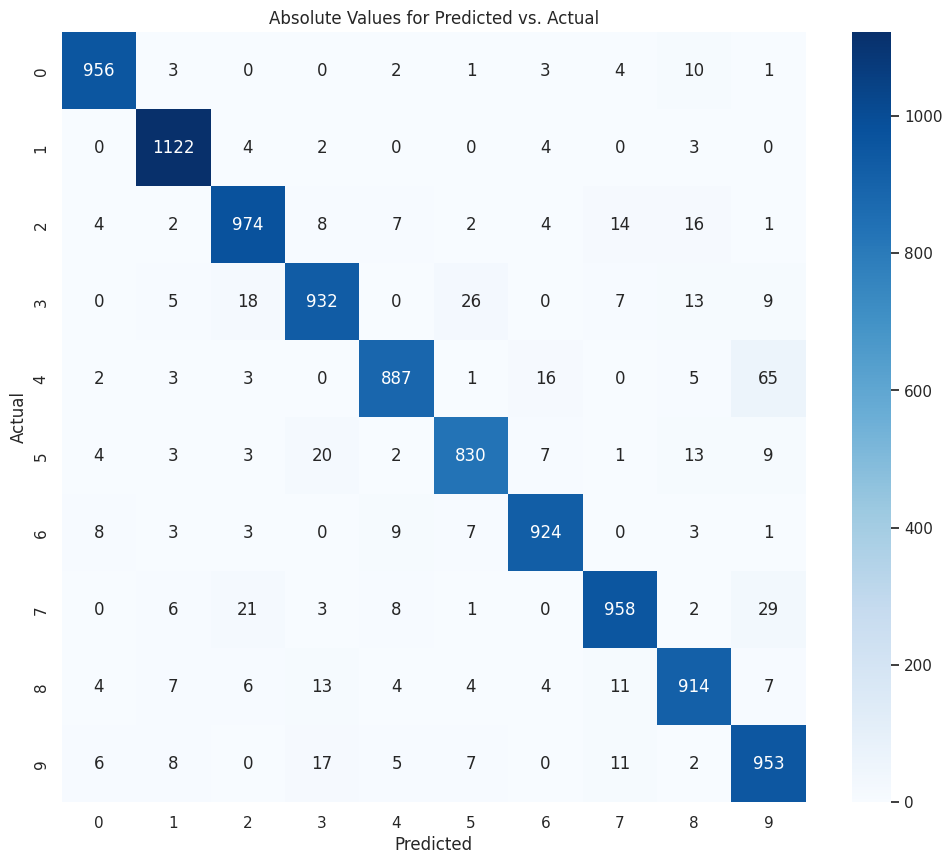

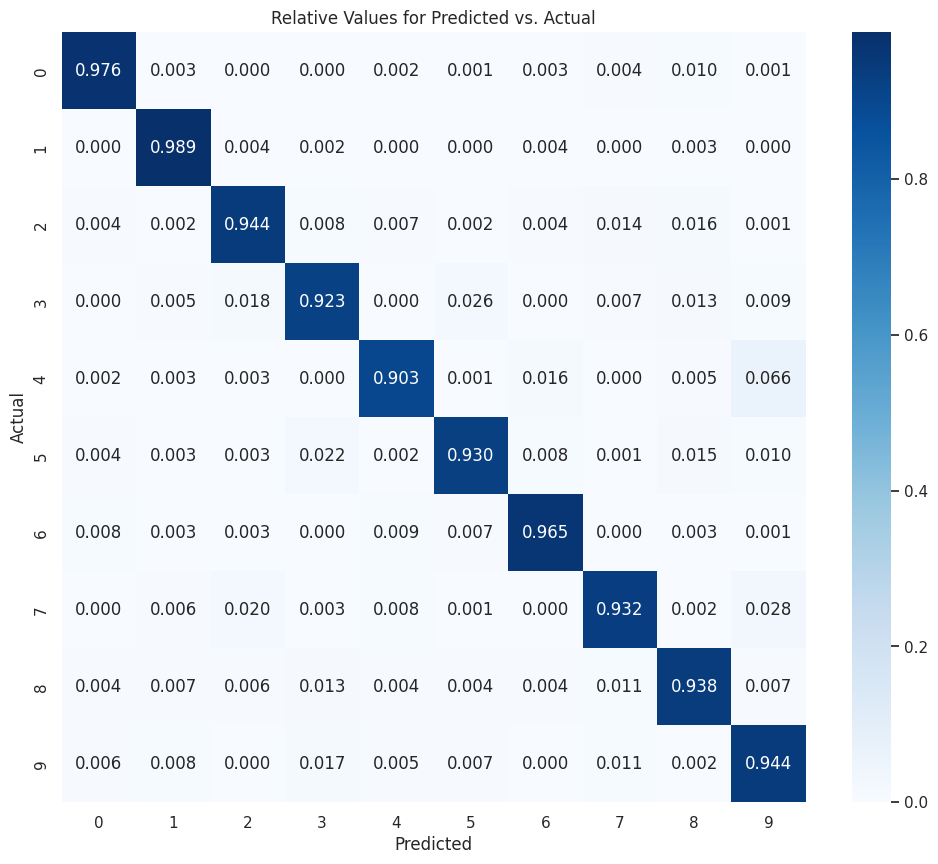

In [11]:
# DISPLAY CONFUSION MATRICES
import sklearn.metrics
import seaborn as sn
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

# Compute confusion matrix
predicted = model.predict(testData)
predicted = np.argmax(predicted, axis=1)
actual = np.argmax(testLabels, axis=1)
matrix = sklearn.metrics.confusion_matrix(actual, predicted)
# Display absolute valued confusion matrix
df_cm = pd.DataFrame(matrix, range(10),
                  range(10))
plt.figure(figsize=(12,10))
sn.set(font_scale=1)#for label size
ax = sn.heatmap(df_cm, annot=True,annot_kws={"size": 12}, cmap="Blues", fmt='g')# font size
ax.set(xlabel='Predicted', ylabel='Actual', title="Absolute Values for Predicted vs. Actual")
plt.show()

# Display relative-value confusion matrix
matrixRel = []
for row in matrix:
    row = row / np.sum(row)
    matrixRel.append(row)

df_cm = pd.DataFrame(matrixRel, range(10),
                  range(10))
plt.figure(figsize=(12,10))
sn.set(font_scale=1)#for label size
ax = sn.heatmap(df_cm, annot=True,annot_kws={"size": 12}, cmap="Blues", fmt='0.3f')# font size
ax.set(xlabel='Predicted', ylabel='Actual', title="Relative Values for Predicted vs. Actual")
plt.show()